___

<a href='http://www.quppler.com'> <img src='../Quppler.png' /></a>
___
# Person Survival Prediction 

We'll be trying to predict a classification- person survival or deceased based on [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic).

## Import Libraries

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Reading Data

Let's start by reading in the titanic_trainData.csv file into a pandas dataframe.

In [168]:
train = pd.read_csv('titanic_trainData.csv')

In [169]:
#Entire dataframe details- rows & columns
train.head()
#     PassengerId  Passenger Id 
# 1   Survived    discrete value wheather survived or not  
# 2   Pclass      Passenger Class 
# 3   Age         Age 
# 4   Name        Passenger name  
# 5   Sex         Passenger Gender 
# 6   SibSp       Number of siblings of passenger onboard  
# 7   Parch       Parent-Childern aboard
# 8   Ticket      Ticket Number
# 9   Fare        Fare Charged  
# 10  Cabin       Cabin allocated  
# 11  Embarked    Notations of different locations 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [170]:
#Count of rows, columns & datatype of each feature
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [171]:
#Statistical info of dataframe
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

## Find Missing Data


In [172]:
train.isnull()
# Cross check first row data
# False -- If not null
# True -- If null

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


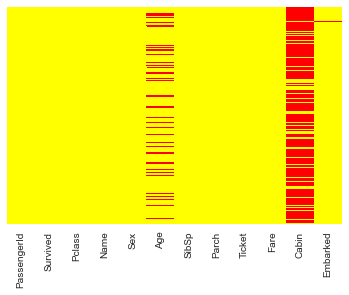

In [173]:
#We can use seaborn to create a simple heatmap to see where we are missing data i.e in boolean values
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='autumn_r')

Around 20% of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. 
Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

Let's continue on by visualizing some more data !!

In [174]:
sns.set_style('darkgrid')

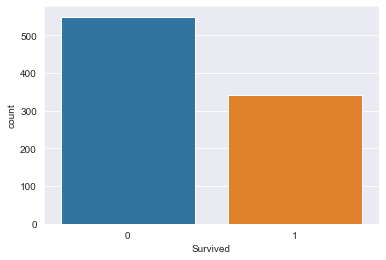

In [175]:
sns.countplot(x='Survived',data=train)
#Looks like 550 ppl didn't survived but around 330 ppl survived

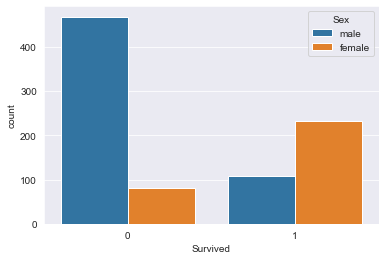

In [176]:
sns.countplot(x='Survived',hue='Sex',data=train)
#Looks like more male died as compared to women 

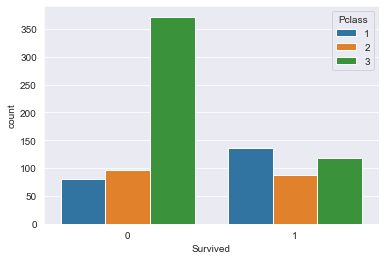

In [177]:
sns.countplot(x='Survived',hue='Pclass',data=train)
#Looks like ppl from 3rd class died more and avearage distribution of ppl survived from each class

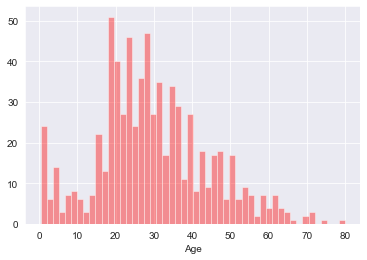

In [178]:
#dropna() - Will not display null values
#kde - kernel density estimate
#Age of ppl boarded on ship
sns.distplot(train['Age'].dropna(),kde=False,color='red',bins=50)

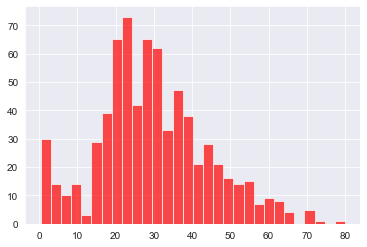

In [179]:
# Another way for visualizing if u dont want seaborn
train['Age'].hist(bins=30,color='red',alpha=0.7)

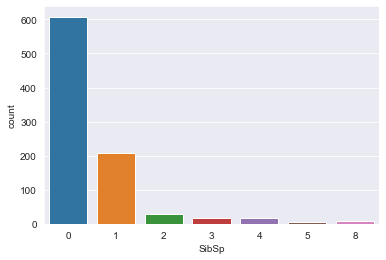

In [180]:
#Number of siblings of passenger onboard  
sns.countplot(x='SibSp',data=train)
#Looks like most ppl don't have siblings onboarded the ship

In [181]:
train['Fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

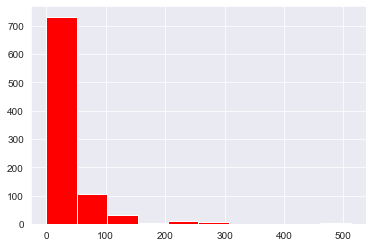

In [185]:
train['Fare'].hist(color='red')

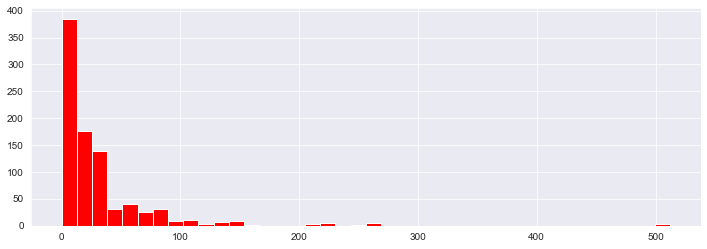

In [103]:
train['Fare'].hist(color='red',bins=40,figsize=(12,4))
#Looks like most ppl paid between 0-100

____

### Cufflinks example for plots
___


In [186]:
import cufflinks as cf
cf.go_offline()

In [113]:
#To make more interactice we can use cufflinks
train['Fare'].iplot(kind='hist',bins=40,color='red')

___
## Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. For example:


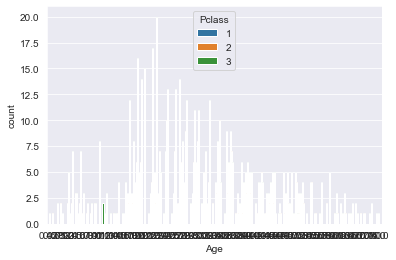

In [110]:
sns.countplot(x='Age',hue='Pclass',data=train)

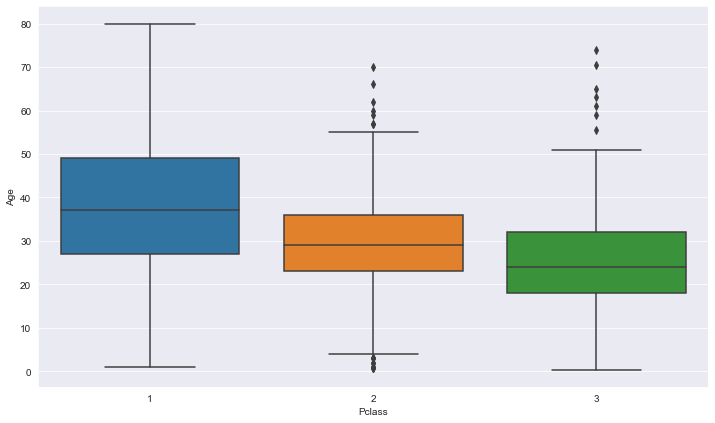

In [187]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train)

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [114]:
def compute_age(Columns):
    Age = Columns[0]
    Pclass = Columns[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

Now apply that function!

In [188]:
#axis=1 - to apply across the columns
train['Age'] = train[['Age','Pclass']].apply(compute_age,axis=1)

Now let's cross check the heat map again !!

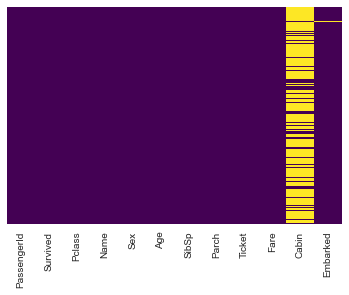

In [189]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
#Looks like we no longer have any missing age data in age columns

Great! Let's go ahead and drop the Cabin column and the row in Embarked that is NaN.

In [190]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [192]:
train.drop('Cabin',axis=1,inplace=True)
#lets check the heatmap after dropping Cabin column
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

KeyError: "['Cabin'] not found in axis"

In [193]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


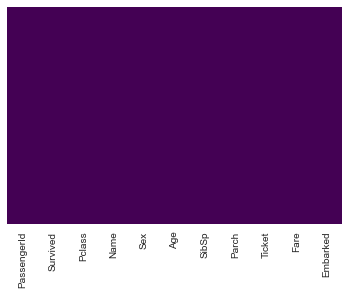

In [194]:
#Drop any missing values
train.dropna(inplace=True)
#lets check the heatmap after dropping Cabin column
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
# Great now we have one solid color & we are good to go with this clean data

## Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [195]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [196]:
pd.get_dummies(train['Sex'])
# One column is perfect predictor of other column

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [197]:
pd.get_dummies(train['Sex'],drop_first=True)

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [126]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [198]:
# Sex dataframe will now have one column male to identify sex
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [199]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)
#Note C column had been dropped

In [200]:
# embark dataframe will now have one column male to identify city
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [201]:
#Drop the unwanted column with String & un Categorial values
train.drop(['PassengerId','Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [202]:
#Add the new column sex , embark in existing dataframe
train = pd.concat([train,sex,embark],axis=1)

In [203]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


Great ! Our data is ready for our model!

# Creating a Logistic Regression model



## Train Test Split

In [204]:
from sklearn.model_selection import train_test_split

In [205]:
# Independent variables all columns will be features except Survived column
x=train.drop('Survived',axis=1)
# Dependent variable what we will predict
y=train['Survived']

In [206]:
#Using model_selection.train_test_split from sklearn to split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=101)

## Training and Predicting

In [207]:
from sklearn.linear_model import LogisticRegression

In [209]:
#max_iter=1000
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [210]:
predictions = logmodel.predict(X_test)

In [211]:
print(predictions)

[0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1
 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 1 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0
 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0
 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0
 1 1 0 0 0 0 1 1]


Let's move on to evaluate our model!

## Evaluation

We can check precision,recall,f1-score using classification report!

In [212]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.69      0.76       104

    accuracy                           0.83       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



In [213]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[150,  13],
       [ 32,  72]], dtype=int64)

In [214]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.8314606741573034



## Completed !